# EDA sobre un Dataset de los personajes que aparecen en Harry Potter

Este es un análisis para obtener información relevante sobre el dataset de los personajes de Harry Potter.

In [1]:
import numpy as np
from Functions_Visual import *
import Functions_Visual as fv
import Functions_Cleaning as fc

In [2]:
# ESTABLECEMOS EL TEMA BASE DE LOS GRÁFICOS QUE SE VAN A REALIZAR
# HACEMOS QUE LOS GRÁFICOS SIEMPRE SE QUEDEN GRABADOS EN EL NOTEBOOK
sns.set_theme()
%matplotlib inline

In [3]:
# CARGAMOS EL DATASET
df_orig = pd.read_csv('./data/Characters_Harry_Potter.csv', sep = ";")

In [4]:
df_orig.info() # MOSTRAMOS ESTRUCTURA GENERAL DEL DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            140 non-null    int64 
 1   Name          140 non-null    object
 2   Gender        139 non-null    object
 3   Job           121 non-null    object
 4   House         101 non-null    object
 5   Wand          132 non-null    object
 6   Patronus      123 non-null    object
 7   Species       140 non-null    object
 8   Blood status  123 non-null    object
 9   Hair colour   123 non-null    object
 10  Eye colour    86 non-null     object
 11  Loyalty       89 non-null     object
 12  Skills        113 non-null    object
 13  Birth         127 non-null    object
 14  Death         42 non-null     object
dtypes: int64(1), object(14)
memory usage: 16.5+ KB


In [ ]:
df_orig.describe() # PRESENTAMOS ESTADISTICAS DESCRIPTIVAS(SÓLO HAY UNA COLUMNA NUMÉRICA LA CUÁL NO SIRVE PARA ANALIZAR)

,Id
count,140.0000
mean,70.5000
std,40.5586
min,1.0000
25%,35.7500
50%,70.5000
75%,105.2500
max,140.0000


In [ ]:
# MOSTRAMOS CUANTOS VALORES FALTANTES HAY EN CADA COLUMNA
print("Valores faltantes por columna:")
print(df_orig.isnull().sum(), "\n\n")

# MOSTRAMOS LA CANTIDAD DE VALORES ÚNICOS PARA DETECTAR POSIBLES INCOSISTENCIAS
count_unique_values = df_orig.nunique()
print("Valores únicos:")
print(count_unique_values)

Valores faltantes por columna:
Id               0
Name             0
Gender           1
Job             19
House           39
Wand             8
Patronus        17
Species          0
Blood status    17
Hair colour     17
Eye colour      54
Loyalty         51
Skills          27
Birth           13
Death           98
dtype: int64 


Valores únicos:
Id              140
Name            140
Gender            2
Job              65
House             6
Wand             29
Patronus         19
Species          10
Blood status     15
Hair colour      36
Eye colour       25
Loyalty          19
Skills           94
Birth           112
Death            25
dtype: int64


In [ ]:
# MOSTRAMOS LA CANTIDAD DE VALORES ÚNICOS PARA DETECTAR POSIBLES INCOSISTENCIAS, Y LA CARDINALIDAD
count_unique_values = df_orig.nunique()
print("Valores únicos:")
print(count_unique_values)

print("\n\n", "Cardinalidad:")
print(count_unique_values / len(df_orig) * 100)

Valores únicos:
Id              140
Name            140
Gender            2
Job              65
House             6
Wand             29
Patronus         19
Species          10
Blood status     15
Hair colour      36
Eye colour       25
Loyalty          19
Skills           94
Birth           112
Death            25
dtype: int64


 Cardinalidad:
Id              100.000000
Name            100.000000
Gender            1.428571
Job              46.428571
House             4.285714
Wand             20.714286
Patronus         13.571429
Species           7.142857
Blood status     10.714286
Hair colour      25.714286
Eye colour       17.857143
Loyalty          13.571429
Skills           67.142857
Birth            80.000000
Death            17.857143
dtype: float64


- Dada la alta cardinalidad en la columna skills y Birth, y la alta cantidad de nulos en la columna Death, he decidido eliminarlas. 
- Tampoco las considero relevantes para mi análisis. 

In [ ]:
df_orig.head() # OBSERVAMOS PRIMERAS FILAS

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,Bright green,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,31 July 1980,NaN
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1 March 1980,NaN
2,3,Hermione Jean Granger,Female,Student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,Human,Muggle-born,Brown,Brown,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything,"19 September, 1979",NaN
3,4,Albus Percival Wulfric Brian Dumbledore,Male,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,Human,Half-blood,Silver| formerly auburn,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...,Late August 1881,"30 June, 1997"
4,5,Rubeus Hagrid,Male,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",NaN,Half-Human/Half-Giant,Part-Human (Half-giant),Black,Black,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...,6 December 1928,NaN


Compruebo los valores únicos de algunas columnas para ver su contenido y si hay que limpiar o agrupar de alguna forma.

In [9]:
# Obtener los valores únicos de las columnas relevantes
columns_to_check = ["House", "Hair colour", "Eye colour", "Species", "Loyalty"]

# Mostrar los valores únicos para cada columna
for col in columns_to_check:
    print(f"Valores únicos en '{col}':")
    print(df_orig[col].unique())
    print("\n")

Valores únicos en 'House':
['Gryffindor' 'Ravenclaw' 'Slytherin' nan 'Hufflepuff'
 'Beauxbatons Academy of Magic' 'Durmstrang Institute']


Valores únicos en 'Hair colour':
['Black' 'Red' 'Brown' 'Silver| formerly auburn' 'Blond' 'Sandy' 'Auburn'
 'Light brown flecked with grey' 'Colourless and balding' nan 'Dark'
 'Mousy' 'Dirty-blonde' 'White' 'Reddish-blonde' 'Blonde' 'White-blond'
 'Iron grey' 'Bald' 'Grey' 'White (balding)' 'Straw blond' 'Variable'
 'Red brown' 'Brown/greying' 'Silver| formerly black' 'Tawny' 'Silver'
 'Silvery-blonde' 'Ginger' 'Straw-coloured' 'Red ' 'Reddish-brown'
 'Mousy brown' 'Jet-black' 'White blond' 'Green']


Valores únicos en 'Eye colour':
['Bright green' 'Blue' 'Brown' 'Black' nan 'Bright brown' 'Hazel' 'Grey'
 'Green' 'Dark' 'Pale silvery' 'Silvery' 'Gooseberry' 'Scarlet\xa0'
 'Pale, freckled' 'Astonishingly blue' 'Variable'
 'One dark,\xa0one electric blue' 'Yellowish' 'Ruddy' 'Grey/Blue['
 'Dark blue[' 'Bright Blue' 'Dark Grey' 'Pale' 'Yellow']


Val

- Muchas columnas con nulos, hay que revisar que hacer (posiblemente haya que rellenar con 'Unknown' o sustituir por estadístico).
- Columnas categóricas House, Loyalty, Species, Eye Colour Y hair Colour hay que revisar incosistencias o posibles agrupaciones.
- Eliminar las columnas birth, death, job, skills, wand y patronus pues no son relevantes en mi análisis.
- Columna ID y name con cardinalidades 100%, se pueden usar cómo Index.

In [10]:
df_copy = df_orig.copy()

In [11]:
# ELIMINO DUPLICADOS POR SI ACASO EXISTEN
df_copy = df_copy.drop_duplicates()

# ELIMINO ESTAS COLUMNAS PORQUE NO SON RELEVANTES PARA MI ANÁLISIS
df_copy = df_copy.drop(columns = ["Birth", "Death", "Skills", "Job", "Wand", "Patronus"])

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            140 non-null    int64 
 1   Name          140 non-null    object
 2   Gender        139 non-null    object
 3   House         101 non-null    object
 4   Species       140 non-null    object
 5   Blood status  123 non-null    object
 6   Hair colour   123 non-null    object
 7   Eye colour    86 non-null     object
 8   Loyalty       89 non-null     object
dtypes: int64(1), object(8)
memory usage: 10.0+ KB


Primero vamos a limpiar las columnas House, Eye colour, Hair colour y Species (De momento sin tocar los NaN)

In [13]:
# FUNCIÓN PARA LIMPIAR LAS COLUMNAS SPECIES, HOUSE, HAIR_COLOUR Y EYE_COLOUR
df_copy = fc.map_dataframe(df_copy)

Ahora reemplazamos los NaN de las columnas House, Eye colour y Hair colour


In [14]:
# REEMPLAZAMOS LOS VALORES FALTANTES DE LA COLUMNA HOUSE CON "UNKNOWN"
df_copy["House"] = df_copy["House"].fillna("Unknown")

In [15]:
# REEMPLAZAMOS LOS VALORES FALTANTES DE LA COLUMNA EYE COLOUR CON "UNKNOWN"
df_copy["Eye colour"] = df_copy["Eye colour"].fillna("Unknown")

In [16]:
# REEMPLAZAMOS LOS VALORES FALTANTES DE LA COLUMNA HAIR COLOUR CON "UNKNOWN"
df_copy["Hair colour"] = df_copy["Hair colour"].fillna("Unknown")

In [17]:
# MOSTRAMOS LOS VALORES ÚNICOS ANTES Y DESPUÉS DE LIMPIAR
print("Antes de limpiar:")
print(df_orig[["House", "Species", "Hair colour", "Eye colour"]].nunique())

print("\n\n", "Después de limpiar:")
print(df_copy[["House", "Species", "Hair colour", "Eye colour"]].nunique())

Antes de limpiar:
House           6
Species        10
Hair colour    36
Eye colour     25
dtype: int64


 Después de limpiar:
House           7
Species         6
Hair colour    10
Eye colour      8
dtype: int64


In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            140 non-null    int64 
 1   Name          140 non-null    object
 2   Gender        139 non-null    object
 3   House         140 non-null    object
 4   Species       140 non-null    object
 5   Blood status  123 non-null    object
 6   Hair colour   140 non-null    object
 7   Eye colour    140 non-null    object
 8   Loyalty       89 non-null     object
dtypes: int64(1), object(8)
memory usage: 10.0+ KB


Ahora obtenemos los valores absolutos y relativos de estas 4 columnas limpiadas

In [19]:
abs_values_house = df_copy['House'].value_counts()
rel_values_house = df_copy['House'].value_counts(normalize = True)

abs_values_species = df_copy['Species'].value_counts()
rel_values_species = df_copy['Species'].value_counts(normalize = True)

abs_values_eye_colour = df_copy['Eye colour'].value_counts()
rel_values_eye_colour = df_copy['Eye colour'].value_counts(normalize = True)

abs_values__hair_colour = df_copy['Hair colour'].value_counts()
rel_values__hair_colour = df_copy['Hair colour'].value_counts(normalize = True)

In [20]:
print(abs_values_house)
print(rel_values_house)

House
Unknown        39
Gryffindor     38
Slytherin      28
Ravenclaw      18
Hufflepuff     13
Beauxbatons     3
Durmstrang      1
Name: count, dtype: int64
House
Unknown        0.278571
Gryffindor     0.271429
Slytherin      0.200000
Ravenclaw      0.128571
Hufflepuff     0.092857
Beauxbatons    0.021429
Durmstrang     0.007143
Name: proportion, dtype: float64


In [21]:
print(abs_values_species)
print(rel_values_species)

Species
Human         106
Unknown        23
Ghost           6
Half-Human      2
Werewolf        2
Centaur         1
Name: count, dtype: int64
Species
Human         0.757143
Unknown       0.164286
Ghost         0.042857
Half-Human    0.014286
Werewolf      0.014286
Centaur       0.007143
Name: proportion, dtype: float64


In [22]:
print(abs_values_eye_colour)
print(rel_values_eye_colour)

Eye colour
Unknown    68
Brown      29
Grey       14
Blue       13
Green       7
Black       7
Hazel       1
Yellow      1
Name: count, dtype: int64
Eye colour
Unknown    0.485714
Brown      0.207143
Grey       0.100000
Blue       0.092857
Green      0.050000
Black      0.050000
Hazel      0.007143
Yellow     0.007143
Name: proportion, dtype: float64


In [23]:
print(abs_values__hair_colour)
print(rel_values__hair_colour)

Hair colour
Unknown    54
Black      26
Brown      22
Red        14
Grey       11
Blond       8
White       2
Silver      1
Auburn      1
Bald        1
Name: count, dtype: int64
Hair colour
Unknown    0.385714
Black      0.185714
Brown      0.157143
Red        0.100000
Grey       0.078571
Blond      0.057143
White      0.014286
Silver     0.007143
Auburn     0.007143
Bald       0.007143
Name: proportion, dtype: float64


A continuación limpiamos la columna Blood Status. Empezamos haciendo el value_counts( )

In [24]:
df_copy["Blood status"].value_counts(dropna = False)

Blood status
Pure-blood or half-blood      38
Pure-blood                    34
Half-blood                    23
NaN                           17
Muggle-born                    7
Pure-blood or Half-blood       5
Muggle                         4
Part-Human (Half-giant)        2
Pure-blood or half-blood       2
Quarter-Veela                  2
Half-blood or pure-blood       1
Unknown                        1
Part-Goblin                    1
Muggle-born or half-blood[     1
Half-blood[                    1
Squib                          1
Name: count, dtype: int64

In [25]:
# APLICAMOS UNA FUNCIÓN QUE AGREGA LOS VALORES 

df_copy['Blood status'] = fc.limpiar_agrupacion_blood_status(df_copy['Blood status'])

Mostramos los valores después de esta limpieza

In [26]:
df_copy["Blood status"].value_counts(dropna = False)

Blood status
Others        53
Pure-blood    34
Half-blood    24
NaN           17
Muggle        12
Name: count, dtype: int64

Ahora terminamos de limpiarla sustiyendo los NaN por "Others"

In [27]:
df_copy["Blood status"] = df_copy["Blood status"].fillna("Others")

In [28]:
# COMPROBAMOS COMO QUEDA LA COLUMNA
df_copy["Blood status"].value_counts()

Blood status
Others        70
Pure-blood    34
Half-blood    24
Muggle        12
Name: count, dtype: int64

Obtenemos sus valores absolutos y relativos

In [29]:
abs_values_blood = df_copy['Blood status'].value_counts()
rel_values_blood = df_copy['Blood status'].value_counts(normalize = True)

In [30]:
print(abs_values_blood)
print("\n\n",rel_values_blood)

Blood status
Others        70
Pure-blood    34
Half-blood    24
Muggle        12
Name: count, dtype: int64


 Blood status
Others        0.500000
Pure-blood    0.242857
Half-blood    0.171429
Muggle        0.085714
Name: proportion, dtype: float64


Ahora limpiamos la columna Gender que sólo tiene un valor faltante

In [31]:
df_copy["Gender"].value_counts(dropna = False)

Gender
Male      90
Female    49
NaN        1
Name: count, dtype: int64

Cómo sólo hay un valor faltante, voy a sustituirlo con la Moda

In [32]:
df_copy["Gender"] = df_copy["Gender"].fillna(df_copy["Gender"].mode()[0])

In [33]:
# COMPROBAMOS COMO QUEDA LA COLUMNA
df_copy["Gender"].value_counts()

Gender
Male      91
Female    49
Name: count, dtype: int64

Ahora obtenemos sus valores absolutos y relativos

In [34]:
abs_values_gen = df_copy['Gender'].value_counts()
rel_values_gen = df_copy['Gender'].value_counts(normalize = True)

In [35]:
print(abs_values_gen)
print("\n\n",rel_values_gen)

Gender
Male      91
Female    49
Name: count, dtype: int64


 Gender
Male      0.65
Female    0.35
Name: proportion, dtype: float64


Antes de limpiar la última columna, vamos a mostrar cómo ha quedado la estructura del DF hasta ahora con el método .info( )

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            140 non-null    int64 
 1   Name          140 non-null    object
 2   Gender        140 non-null    object
 3   House         140 non-null    object
 4   Species       140 non-null    object
 5   Blood status  140 non-null    object
 6   Hair colour   140 non-null    object
 7   Eye colour    140 non-null    object
 8   Loyalty       89 non-null     object
dtypes: int64(1), object(8)
memory usage: 10.0+ KB


Por último, limpiamos la columna Loyalty. Para esta columna si vamos a limpiar los NaN directamente dado que es más cómodo y manejable así

Primero vamos a hacer un value_counts( ) para ver la distribución de esta columna

In [37]:
df_copy["Loyalty"].value_counts(dropna = False)

Loyalty
NaN                                                                                                         51
Order of the Phoenix                                                                                        16
Dumbledore's Army |Hogwarts School of Witchcraft and Wizardry                                               14
Lord Voldemort  | Death Eaters                                                                              12
Original Order of the Phoenix                                                                                8
Hogwarts School of Witchcraft and Wizardry                                                                   8
Dumbledore's Army | Order of the Phoenix | Hogwarts School of Witchcraft and Wizardry                        8
Dumbledore's Army                                                                                            6
Minister of Magic                                                                                       

Aplicamos la función de categorize_loyalty( ) a la columna 'Loyalty'

In [38]:
# ESTA FUNCION REEAGRUPA LOS VALORES DE LA COLUMNA LOYALTY EXCEPTO LOS NAN 
df_copy["Loyalty"] = df_copy['Loyalty'].apply(lambda x: fc.categorize_loyalty(x, fc.loyalty_mapping))


In [39]:
# COMPROBAMOS COMO QUEDA LA COLUMNA
df_copy["Loyalty"].value_counts()

Loyalty
[Unknown]                                    51
[Hogwarts]                                   30
[Order of the Phoenix]                       24
[Death Eaters]                               14
[Hogwarts, Order of the Phoenix]             11
[Others]                                      5
[Order of the Phoenix, Others]                2
[Hogwarts, Order of the Phoenix, Others]      1
[Ministry of Magic]                           1
[Ministry of Magic, Order of the Phoenix]     1
Name: count, dtype: int64

Obtenemos los valores absolutos y relativos

In [40]:
abs_values_loyal = df_copy['Loyalty'].value_counts()
rel_values_loyal = df_copy['Loyalty'].value_counts(normalize = True)

In [41]:
print(abs_values_loyal)
print("\n\n",rel_values_loyal)

Loyalty
[Unknown]                                    51
[Hogwarts]                                   30
[Order of the Phoenix]                       24
[Death Eaters]                               14
[Hogwarts, Order of the Phoenix]             11
[Others]                                      5
[Order of the Phoenix, Others]                2
[Hogwarts, Order of the Phoenix, Others]      1
[Ministry of Magic]                           1
[Ministry of Magic, Order of the Phoenix]     1
Name: count, dtype: int64


 Loyalty
[Unknown]                                    0.364286
[Hogwarts]                                   0.214286
[Order of the Phoenix]                       0.171429
[Death Eaters]                               0.100000
[Hogwarts, Order of the Phoenix]             0.078571
[Others]                                     0.035714
[Order of the Phoenix, Others]               0.014286
[Hogwarts, Order of the Phoenix, Others]     0.007143
[Ministry of Magic]                        

Dado que hemos transformado la columna a listas de valores(string), vamos a mostrar la proporción de personas que son leales a 1 sólo grupo y la proporción de las personas que son leales a 2 o más. Podría ser interesante el dato

In [42]:
one_loyalty = (df_copy["Loyalty"].apply(len) == 1).value_counts().iloc[0]
one_loyalty

125

In [43]:
several_loyalty = (df_copy["Loyalty"].apply(len) > 1).value_counts().iloc[1]
several_loyalty

15

Hay 125 personajes que sólo son leales a un único grupo y 15 personajes que son leales a varios.

Cómo la columna 'Loyalty' contiene listas de valores, vamos a aplicar el método explode( ) para poder visualizar las posibles relaciones de esa columna con otras.

In [44]:
# TRANSFORMAMOS LAS LISTAS DE LOS VALORES DE LA COLUMNA LOYALTY EN FILAS INDEPENDIENTES
df_copy_exploded = df_copy.explode("Loyalty", ignore_index = True)

In [45]:
df_copy_exploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            156 non-null    int64 
 1   Name          156 non-null    object
 2   Gender        156 non-null    object
 3   House         156 non-null    object
 4   Species       156 non-null    object
 5   Blood status  156 non-null    object
 6   Hair colour   156 non-null    object
 7   Eye colour    156 non-null    object
 8   Loyalty       156 non-null    object
dtypes: int64(1), object(8)
memory usage: 11.1+ KB


In [46]:
df_copy_exploded.head(10)

,Id,Name,Gender,House,Species,Blood status,Hair colour,Eye colour,Loyalty
0,1,Harry James Potter,Male,Gryffindor,Human,Half-blood,Black,Green,Hogwarts
1,1,Harry James Potter,Male,Gryffindor,Human,Half-blood,Black,Green,Order of the Phoenix
2,2,Ronald Bilius Weasley,Male,Gryffindor,Human,Pure-blood,Red,Blue,Hogwarts
3,2,Ronald Bilius Weasley,Male,Gryffindor,Human,Pure-blood,Red,Blue,Order of the Phoenix
4,3,Hermione Jean Granger,Female,Gryffindor,Human,Muggle,Brown,Brown,Hogwarts
5,3,Hermione Jean Granger,Female,Gryffindor,Human,Muggle,Brown,Brown,Order of the Phoenix
6,4,Albus Percival Wulfric Brian Dumbledore,Male,Gryffindor,Human,Half-blood,Silver,Blue,Hogwarts
7,4,Albus Percival Wulfric Brian Dumbledore,Male,Gryffindor,Human,Half-blood,Silver,Blue,Order of the Phoenix
8,5,Rubeus Hagrid,Male,Gryffindor,Half-Human,Others,Black,Black,Hogwarts
9,5,Rubeus Hagrid,Male,Gryffindor,Half-Human,Others,Black,Black,Order of the Phoenix


In [47]:
# ESTABLECEMOS EL ID COMO INDICE
# !OJO! CÓMO HEMOS HECHO EXPLODE AHORA HAY IDS REPETIDOS, POR LO QUE HAY 156 FILAS PERO 140 IDS ÚNICOS
df_copy_exploded = df_copy_exploded.set_index("Id")

In [48]:
# MOSTRAMOS EL DF LUEGO DE ESTABLECER LA COLUMNA ID COMO INDICE
df_copy_exploded.head(10)

,Name,Gender,House,Species,Blood status,Hair colour,Eye colour,Loyalty
Id,,,,,,,,
1,Harry James Potter,Male,Gryffindor,Human,Half-blood,Black,Green,Hogwarts
1,Harry James Potter,Male,Gryffindor,Human,Half-blood,Black,Green,Order of the Phoenix
2,Ronald Bilius Weasley,Male,Gryffindor,Human,Pure-blood,Red,Blue,Hogwarts
2,Ronald Bilius Weasley,Male,Gryffindor,Human,Pure-blood,Red,Blue,Order of the Phoenix
3,Hermione Jean Granger,Female,Gryffindor,Human,Muggle,Brown,Brown,Hogwarts
3,Hermione Jean Granger,Female,Gryffindor,Human,Muggle,Brown,Brown,Order of the Phoenix
4,Albus Percival Wulfric Brian Dumbledore,Male,Gryffindor,Human,Half-blood,Silver,Blue,Hogwarts
4,Albus Percival Wulfric Brian Dumbledore,Male,Gryffindor,Human,Half-blood,Silver,Blue,Order of the Phoenix
5,Rubeus Hagrid,Male,Gryffindor,Half-Human,Others,Black,Black,Hogwarts


In [49]:
# POSIBLE CÓDIGO PARA VISUALIZAR LA COLUMNA 'LOYALTY' JUNTO A OTRAS
#heatmap_data = df_exploded.value_counts(['Categoria1', 'Categoria2']).unstack(fill_value=0)

#sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True)
#plt.title("Frecuencias entre categorías")
#plt.ylabel("Categoría 1")
#plt.xlabel("Categoría 2")
#plt.show()

## Análisis de las variables 

### Análisis univariante

**Gender**

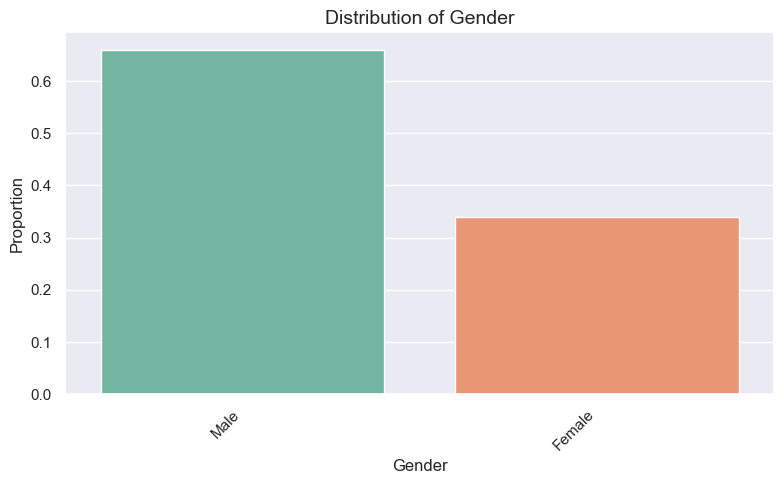

In [50]:
fv.plot_one_variable_categorical(df_copy_exploded, "Gender", figsize = (8, 5), relative = True)

+ La proporción de hombres representa el 60% contra el 40% de las mujeres.

**House**

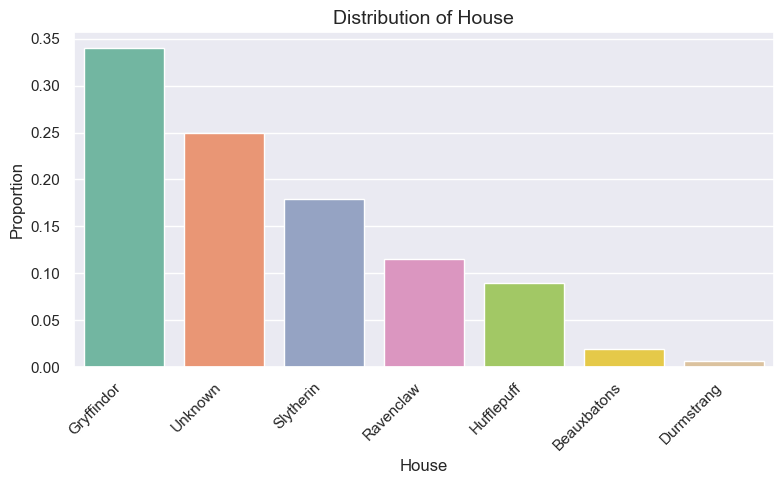

In [51]:
fv.plot_one_variable_categorical(df_copy_exploded, "House", figsize = (8, 5), relative = True)

+ Hay muchos personajes de los cuales no se conoce la casa a la que pertenecen.
+ Las casas más representadas en este dataset son las de Gryffindor, con un 34% y la de Slytherin con un 17%

**Species**

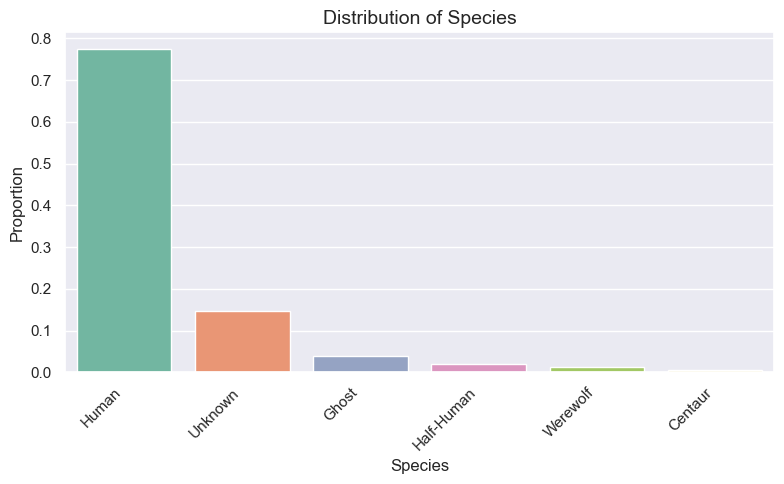

In [52]:
fv.plot_one_variable_categorical(df_copy_exploded, "Species", figsize = (8, 5), relative = True)

+ La gran mayoría de personajes son humanos, casi un 80%.

**Blood status**

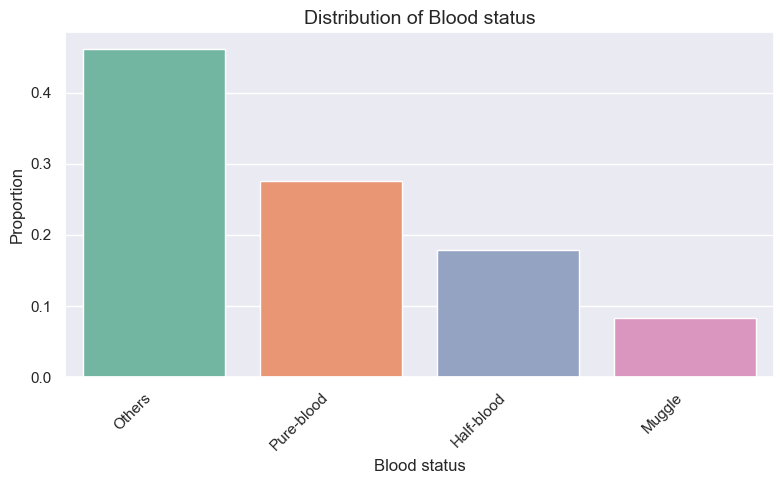

In [53]:
fv.plot_one_variable_categorical(df_copy_exploded, "Blood status", figsize = (8, 5), relative = True)

+ Hay muchos personajes que no tienen un tipo de sangre en concreto definido, por eso se ha creado la categoría 'others'
+ De los personajes que si se tiene información precisa se puede observar que la gran mayoría de ellos son de sangre pura, un 29%. Puede parecer lógico dado que hay magos que son cómo la nobleza con el pueblo, y creen que son superiores y no deberían mezclarse.

**Hair colour**

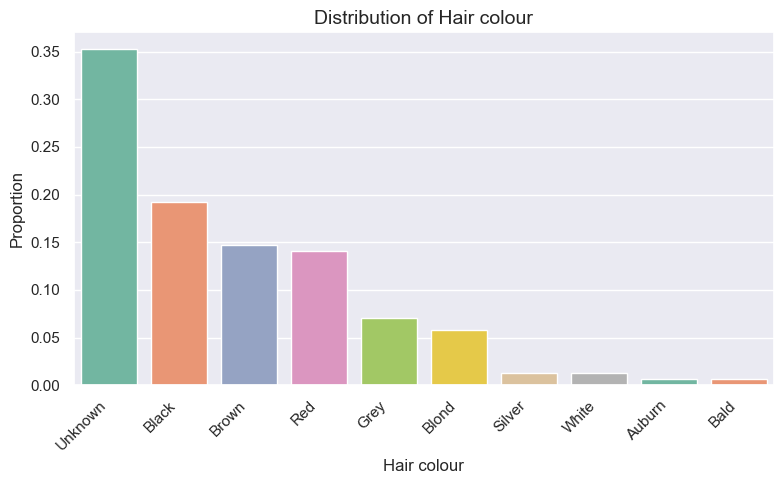

In [54]:
fv.plot_one_variable_categorical(df_copy_exploded, "Hair colour", figsize = (8, 5), relative = True)

**Eye colour**

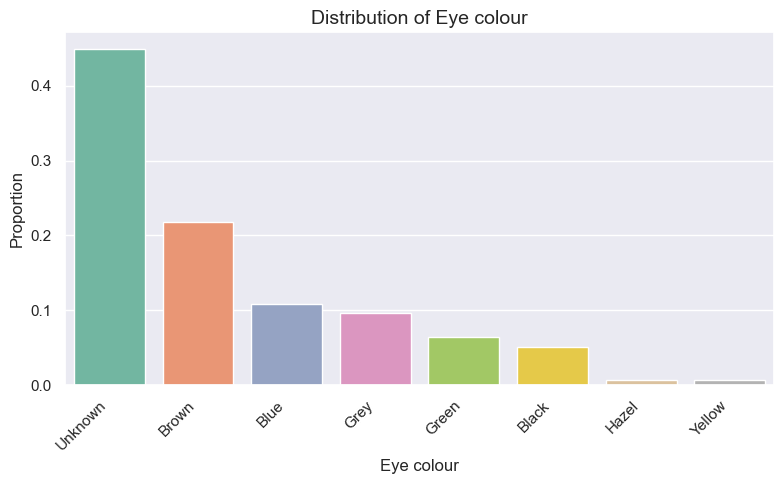

In [55]:
fv.plot_one_variable_categorical(df_copy_exploded, "Eye colour", figsize = (8, 5), relative = True)

**Loyalty**

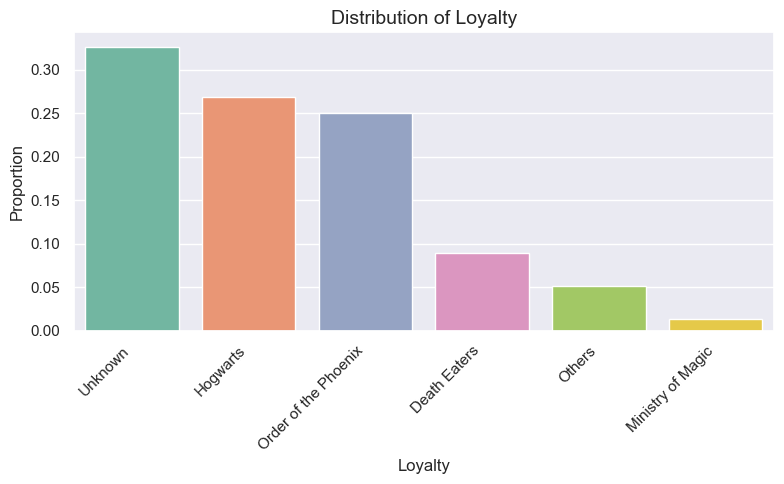

In [56]:
fv.plot_one_variable_categorical(df_copy_exploded, "Loyalty", figsize = (8, 5), relative = True)

### Análisis bivariante

### Análisis multivariante